# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías 
import pandas as pd
import seaborn as sns
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats as st



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users= pd.read_csv('/datasets/megaline_users.csv')
df_calls= pd.read_csv('/datasets/megaline_calls.csv')
df_messages= pd.read_csv('/datasets/megaline_messages.csv')
df_internet= pd.read_csv('/datasets/megaline_internet.csv')
df_plans= pd.read_csv('/datasets/megaline_plans.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Se verifico que hay una columna que contiene los datos en MB y no en GB se procede a realizar la modificacion a GB

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
columns_new ={
    "mb_per_month_included": "gb_per_month_included",    
    }
                                                          #Cambiamos el nombre de la columna 'mb_per_month_included' por 'gb_per_month_included', con el metodo 'rename()'
df_plans.rename(columns= columns_new , inplace= True)
df_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
df_plans['gb_per_month_included']= df_plans['gb_per_month_included'] / 1024     #Convertimos los datos de MB a Gb
df_plans['gb_per_month_included']= np.ceil(df_plans['gb_per_month_included'])   #Aplicamos el metodo ''
df_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()
print()
print('Datos Ausentes:')
df_users.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Datos Ausentes:


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [8]:
# Imprime una muestra de datos para usuarios
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Como podemos observar el dataset contiene un total de 500 filas para cada columna. No se observan datos duplicados en el dataset ni en la columna user_id, una de las columnas presenta 466 datos ausentes, los cuales no se le realizara ninguna modificacion dado a que se nos dio la instruccion de que la presencia de estos datos ausentes es porque al momentos de extraer la base de datos dichos usuarios aun estan en uso del plan. Los Nombres de las columnas se observan correctamente.

Lo que si podemos observar es que en la columna city algunas ciudades estan separadas con '-' y no con espacios ' ', por lo cual se realizara la correcion de estos datos. Tambien vamos a convertir las columnas de fecha a su formato datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
df_users['city']= df_users['city'].str.replace('-', ' ') #Reemplazamos los '-' por espacios ' ' con el metodo replace()
df_users #Verificamos si se realizaron los cambios.

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta Sandy Springs Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle Tacoma Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas Henderson Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle Tacoma Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York Newark Jersey City, NY NJ PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles Long Beach Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York Newark Jersey City, NY NJ PA MSA",2018-02-04,surf,NaN


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
#Convertimos las columnas que contienen fechas a el formato correcto datetime
df_users['reg_date']  = pd.to_datetime(df_users['reg_date'], format="%Y-%m-%d") #Convertimos la columna es datatime
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format="%Y-%m-%d") #Convertimos la columna es datatime
df_users.info() #Verificamos que efectivamente se realizaron los cambios.

df_users.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


0

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Los datos del dataset se ven bien no existen datos ausentes, tampoco existen datos duplicados ya que las columnas que indican tener datos duplicados en realidad no lo son ya que estos datos que contienen, son los registros del mismo clientes cada vez que realiza una llamada en el dia y la duracion de la misma. por ende no se tomaran los datos como duplicados ya que perderiamos mucha data importante.

Por otro lado en la columna id, no nos agrada que los datos esten separados por un '_' lo vamos a cambiar por un '-'. Tambien vamos a convertir la columna 'call_data' a el formato correcto para fechas datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
df_calls['id']= df_calls['id'].str.replace('_', '-') #Reemplazamos los '-' por espacios ' ' con el metodo replace()
df_calls['duration']= np.ceil(df_calls['duration']) #Verificamos si se realizaron los cambios.
df_calls

,id,user_id,call_date,duration
0,1000-93,1000,2018-12-27,9.0
1,1000-145,1000,2018-12-27,14.0
2,1000-247,1000,2018-12-27,15.0
3,1000-309,1000,2018-12-28,6.0
4,1000-380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499-199,1499,2018-11-21,9.0
137731,1499-200,1499,2018-10-20,11.0
137732,1499-201,1499,2018-09-21,9.0
137733,1499-202,1499,2018-10-10,1.0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
#Convertimos las columnas que contienen fechas a el formato correcto datetime
df_calls['call_date']  = pd.to_datetime(df_calls['call_date'], format="%Y-%m-%d") #Convertimos la columna es datatime
df_calls.info() #Verificamos que efectivamente se realizaron los cambios.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [14]:
#Verificamos los datos de llamadas con duracion 0

df_calls[df_calls['duration']== 0]

,id,user_id,call_date,duration
19,1001-4,1001,2018-12-05,0.0
25,1001-13,1001,2018-12-24,0.0
31,1001-30,1001,2018-10-17,0.0
32,1001-31,1001,2018-11-03,0.0
34,1001-35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499-183,1499,2018-11-10,0.0
137715,1499-184,1499,2018-09-15,0.0
137720,1499-189,1499,2018-12-27,0.0
137722,1499-191,1499,2018-12-24,0.0


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Verificamos las llamadas con duracion 0 y vemos que existen 26834 datos de duracion 0, en un caso de la vida real le preguntariamos al area encargada sobre la existencia de esto para ver si se trata de un error de registro o si simplemente fueron llamadas marcadas por error por los clientes las cuales no duraron ni 1 segundo.

Pero en este caso no tenemos forma de como comprobar esto asi que dejaremos los datos como estan.

## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprime una muestra de datos para los mensajes
df_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Los datos del dataset se ven bien no existen datos ausentes, tampoco existen datos duplicados ya que las columnas que indican tener datos duplicados en realidad no lo son ya que estos datos que contienen, son los registros del mismo clientes cada vez que envia un mensaje en el dia y la fecha del mismo. por ende no se tomaran los datos como duplicados ya que perderiamos mucha data importante.

Por otro lado en la columna id, no nos agrada que los datos esten separados por un '_' lo vamos a cambiar por un '-'. Tambien vamos a convertir la columna 'message_date' a el formato correcto para fechas datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
df_messages['id']= df_messages['id'].str.replace('_', '-') #Reemplazamos los '-' por espacios ' ' con el metodo replace()
df_messages #Verificamos si se realizaron los cambios.

,id,user_id,message_date
0,1000-125,1000,2018-12-27
1,1000-160,1000,2018-12-31
2,1000-223,1000,2018-12-31
3,1000-251,1000,2018-12-27
4,1000-255,1000,2018-12-26
...,...,...,...
76046,1497-526,1497,2018-12-24
76047,1497-536,1497,2018-12-24
76048,1497-547,1497,2018-12-31
76049,1497-558,1497,2018-12-24


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
#Convertimos las columnas que contienen fechas a el formato correcto datetime
df_messages['message_date']  = pd.to_datetime(df_messages['message_date']) #Convertimos la columna es datatime
df_messages.info() #Verificamos que efectivamente se realizaron los cambios.

df_messages.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


0

## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Los datos del dataset se ven bien no existen datos ausentes, tampoco existen datos duplicados ya que las columnas que indican tener datos duplicados en realidad no lo son ya que estos datos que contienen, son los registros del mismo clientes cada vez que envia un mensaje en el dia y la fecha del mismo. por ende no se tomaran los datos como duplicados ya que perderiamos mucha data importante.

Por otro lado en la columna id, no nos agrada que los datos esten separados por un '_' lo vamos a cambiar por un '-'. Tambien vamos a convertir la columna 'session_date' a el formato correcto para fechas datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
df_internet['id']= df_internet['id'].str.replace('_', '-') #Reemplazamos los '_' por guiones '-' con el metodo replace()
df_internet #Verificamos si se realizaron los cambios.

,id,user_id,session_date,mb_used
0,1000-13,1000,2018-12-29,89.86
1,1000-204,1000,2018-12-31,0.00
2,1000-379,1000,2018-12-28,660.40
3,1000-413,1000,2018-12-26,270.99
4,1000-442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499-215,1499,2018-10-20,218.06
104821,1499-216,1499,2018-12-30,304.72
104822,1499-217,1499,2018-09-22,292.75
104823,1499-218,1499,2018-12-07,0.00


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
#Convertimos las columnas que contienen fechas a el formato correcto datetime
df_internet['session_date']  = pd.to_datetime(df_internet['session_date']) #Convertimos la columna es datatime
df_internet.info() #Verificamos que efectivamente se realizaron los cambios.

df_internet.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


0

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_month_date = df_calls.rename(columns={'call_date': 'month'}) #Cambiamos el nombre de la columna 'call_date' por 'month'
df_calls_month= calls_month_date['month'].dt.month #Modificamos la columna 'month' para que solo nos muestre los meses teniendo encuenta que en este caso se puede hacer asi ya que los datos que tenemos son todos del año 2018 si tuvieramos mas datos por otros años no seria muy recomendable hacer esto.
call_per_month= df_calls.groupby(['user_id', df_calls_month])['id'].count().reset_index() #Agrupamos los datos que queremos analizar con 'groupby()', aplicamos el metodo count() para contar el numero de llamadas por mes y por cliente, por ultimo utilizamos 'reset_index' para organizar nuestros datos.

new_columns ={
    'id': 'number_of_calls',  #Creamos el nombre nuevo de la colunma 'id' para darle un nombre facil de entender.
}

call_per_month.rename(columns = new_columns, inplace = True) #Agregamos el nuevo nombre de la columna con el metodo 'rename()' y utilizamos el argumento 'inplace=True' realizaran los cambias en todos los datos.
call_per_month #imprimimos para verificar que todo este correcto.

,user_id,month,number_of_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


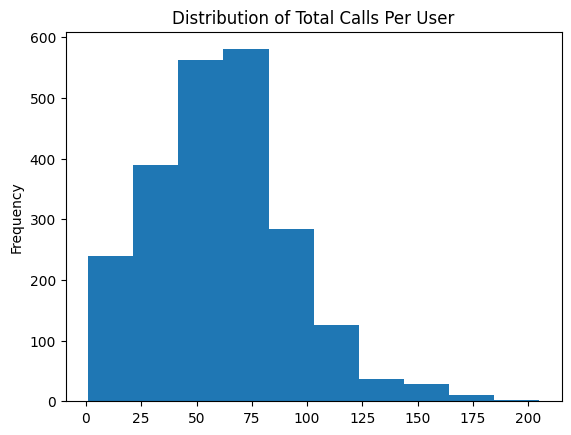

In [26]:
#Realizamos un histograma para observar la distribución del total de llamadas por usuario de ambos planes
call_per_month['number_of_calls'].plot(kind='hist',
                    title='Distribution of Total Calls Per User',
                    legend=False,
                    );

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Como podemos observar, La mayoría de los usuarios realizan entre 40 y 80 llamadas al mes.

In [68]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_call= df_calls.groupby(['user_id', df_calls_month])['duration'].sum().reset_index() #Agrupamos los datos que queremos analizar con 'groupby()', aplicamos el metodo sum() para obtener los minutos totales utilizados de llamadas por mes y por cliente, por ultimo utilizamos 'reset_index' para organizar nuestros datos.
minutes_per_call #imprimimos para verificar que todo este correcto.

,user_id,month,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


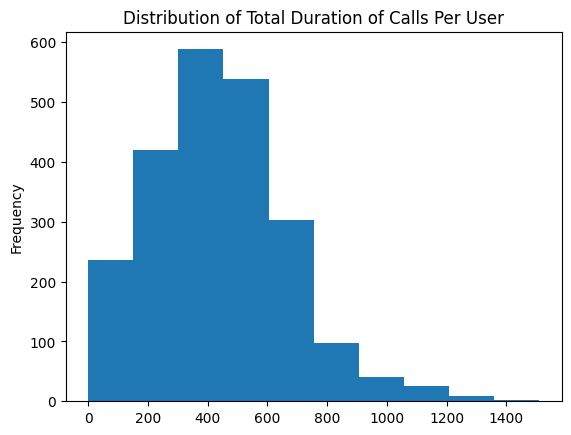

In [28]:
#Realizamos un histograma para observar la distribución del total de duracion de llamadas por mes y por usuario de ambos planes

minutes_per_call['duration'].plot(kind='hist',
                    title='Distribution of Total Duration of Calls Per User',
                    legend=False,
                    );

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos observar en nuestro histograma que la mayoría de los usuarios pasan entre unos 300 y casi 600 minutos al teléfono al mes.

In [29]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_month_date = df_internet.rename(columns={'session_date': 'month'})#Cambiamos el nombre de la columna 'session_date' por 'month'
df_internet_month= internet_month_date['month'].dt.month #Modificamos la columna 'month' para que solo nos muestre los meses teniendo encuenta que en este caso se puede hacer asi ya que los datos que tenemos son todos del año 2018 si tuvieramos mas datos por otros años no seria muy recomendable hacer esto.
mb_per_month_consumed= df_internet.groupby(['user_id', df_internet_month])['mb_used'].sum().reset_index()#Agrupamos los datos que queremos analizar con 'groupby()', aplicamos el metodo sum() para obtener los mb utilizados por mes y por cliente, por ultimo utilizamos 'reset_index' para organizar nuestros datos.
mb_per_month_consumed['gb_used']= np.ceil(mb_per_month_consumed['mb_used']/1024) #Creamos una nueva columna que contiene los datos de navegacion en gb y los redondeamos hacia arriba con 'np.ceil()'
mb_per_month_consumed #imprimimos para verificar que todo este correcto.

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


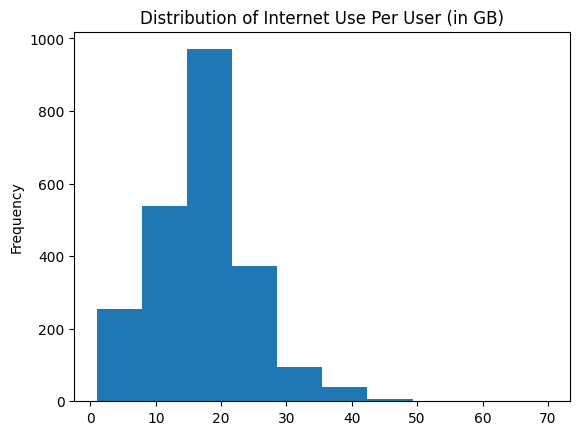

In [30]:
#Realizamos un histograma para observar la distribución del total de datos utilizados por mes y por usuario de ambos planes

mb_per_month_consumed['gb_used'].plot(kind='hist',
                    title='Distribution of Internet Use Per User (in GB)',
                    legend=False,
                    );

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

como podemos ver en nuestro histograma, La mayoría de los usuarios utilizan entre 15 y 20 GB de datos al mes.

In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado. 
messages_month_date = df_messages.rename(columns={'message_date': 'month'}) #Cambiamos el nombre de la columna 'message_date' por 'month'
df_messages_month= messages_month_date['month'].dt.month #Modificamos la columna 'month' para que solo nos muestre los meses teniendo encuenta que en este caso se puede hacer asi ya que los datos que tenemos son todos del año 2018 si tuvieramos mas datos por otros años no seria muy recomendable hacer esto.
messages_per_month= messages_month_date.groupby(['user_id', df_messages_month,])['id'].count().reset_index() #Agrupamos los datos que queremos analizar con 'groupby()', aplicamos el metodo count() para contar el numero de mensajes por mes y por cliente, por ultimo utilizamos 'reset_index' para organizar nuestros datos.
new_columns ={
    'id': 'number_messages_sent',  #Creamos el nuevo nombre de la colunma 'id' para darle un nombre facil de entender.
}
messages_per_month.rename(columns = new_columns, inplace = True)  #Cambiamos el nombre de la colunma 'id' para darle un nombre facil de entender.
messages_per_month #imprimimos para verificar que todo este correcto.

,user_id,month,number_messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


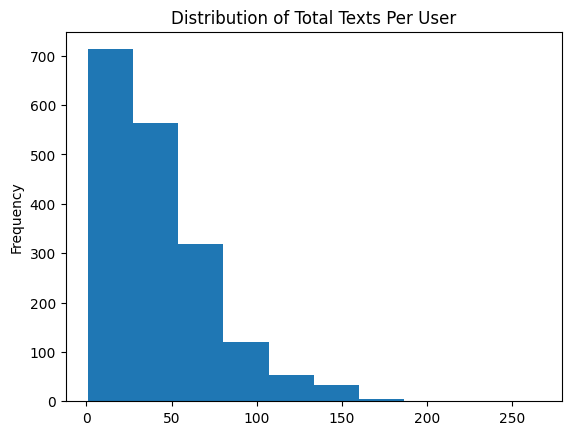

In [32]:
#Realizamos un histograma para observar la distribución del total de mensajes enviados por mes y por usuario de ambos planes

messages_per_month['number_messages_sent'].plot(kind='hist',
                    title='Distribution of Total Texts Per User',
                    legend=False,
                    );

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos observar en nuestro histograma que La mayoría de los usuarios envían entre 0 y 50 mensajes de texto al mes.

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_concat = call_per_month.merge(minutes_per_call, on=['user_id', 'month'], how='outer')
df_concat = df_concat.merge(messages_per_month, on=['user_id', 'month'], how='outer')      # Unimos los datos obtenidos anteriormente con el metodo merge()
df_concat = df_concat.merge(mb_per_month_consumed, on=['user_id', 'month'], how='outer')
df_concat= df_concat.fillna(0)
df_concat #imprimimos para verificar que todo este correcto.

,user_id,month,number_of_calls,duration,number_messages_sent,mb_used,gb_used
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0
2289,1361,5,0.0,0.0,2.0,1519.69,2.0
2290,1482,10,0.0,0.0,2.0,0.00,0.0
2291,1108,12,0.0,0.0,0.0,233.17,1.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [34]:
# Añade la información de la tarifa
users_month_date = df_users.rename(columns={'reg_date': 'month'})  #Cambiamos el nombre de la columna 'reg_date' por 'month' en el dataframe df_users.
users_month_date['month']= users_month_date['month'].dt.month #Modificamos la columna 'month' para que solo nos muestre los meses teniendo encuenta que en este caso se puede hacer asi ya que los datos que tenemos son todos del año 2018 si tuvieramos mas datos por otros años no seria muy recomendable hacer esto.

group_plans= users_month_date.merge(df_plans, left_on='plan', right_on='plan_name', how='left') # Agrupamos con el metodo merge() el dataframe df_users y df_plans.
group_plans= group_plans.drop(['plan_name','month'], axis='columns') # Eliminamos del nuevo dataframe la columna 'plan_name' ya que contiene la misma informacion de la columna 'plan' y tambien eliminamos la columna 'month' de este dataframe ya que en este caso no vamos a realizar estudios por las meses en que los clientes contrataron los servicios, en alguno de los caso de que se quiera saber en que meses es que mayormente los clientes se suscriben en cada plan si la necesitariamos. 

group_date_plans= group_plans.merge(df_concat, on='user_id', how='outer') #Ahora Agrupamos el dataframe 'group_plans' el cual contiene la informacion de los planes con 'df_concat' el cual contiene los datos de consumo de cada cliente por mes, Teniendo en cuenta que este dataframe contiene una columna month que si utilizaremos ya que contiene los meses que identifican cada consumo por cliente cada mes
group_date_plans #imprimimos para verificar que todo este correcto.

,user_id,first_name,last_name,age,city,plan,churn_date,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,number_of_calls,duration,number_messages_sent,mb_used,gb_used
0,1000,Anamaria,Bauer,45,"Atlanta Sandy Springs Roswell, GA MSA",ultimate,NaT,1000,30.0,3000,70,7,0.01,0.01,12.0,16.0,124.0,11.0,1901.47,2.0
1,1001,Mickey,Wilkerson,28,"Seattle Tacoma Bellevue, WA MSA",surf,NaT,50,15.0,500,20,10,0.03,0.03,8.0,27.0,182.0,30.0,6919.15,7.0
2,1001,Mickey,Wilkerson,28,"Seattle Tacoma Bellevue, WA MSA",surf,NaT,50,15.0,500,20,10,0.03,0.03,9.0,49.0,315.0,44.0,13314.82,14.0
3,1001,Mickey,Wilkerson,28,"Seattle Tacoma Bellevue, WA MSA",surf,NaT,50,15.0,500,20,10,0.03,0.03,10.0,65.0,393.0,53.0,22330.49,22.0
4,1001,Mickey,Wilkerson,28,"Seattle Tacoma Bellevue, WA MSA",surf,NaT,50,15.0,500,20,10,0.03,0.03,11.0,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York Newark Jersey City, NY NJ PA MSA",surf,NaT,50,15.0,500,20,10,0.03,0.03,12.0,39.0,339.0,0.0,23137.69,23.0
2299,1499,Shena,Dickson,37,"Orlando Kissimmee Sanford, FL MSA",surf,NaT,50,15.0,500,20,10,0.03,0.03,9.0,41.0,346.0,0.0,12984.76,13.0
2300,1499,Shena,Dickson,37,"Orlando Kissimmee Sanford, FL MSA",surf,NaT,50,15.0,500,20,10,0.03,0.03,10.0,53.0,385.0,0.0,19492.43,20.0
2301,1499,Shena,Dickson,37,"Orlando Kissimmee Sanford, FL MSA",surf,NaT,50,15.0,500,20,10,0.03,0.03,11.0,45.0,308.0,0.0,16813.83,17.0


##### [Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [35]:
# Calcula el ingreso mensual para cada usuario Funcion 1


def calc_ingresos(df, plan):
    """
    Los ingresos por llamadas, mensajes y datos para un plan y un mes específicos.

    Args:
        df (DataFrame): DataFrame que contiene los datos de usuarios, consumos y planes.
        plan (obj):  planes (Surf, Ultimate).
        mes (datatime): Número de mes (1 para enero, 2 para febrero, etc.).

    Returns:
        : Dataframe que contiene los ingresos de llamadas, mensajes, datos, y total de ingresos para cada usuario.
    """


    # Filtrar DataFrame por plan y mes
    df_filtrado = df[
        [
            "user_id",
            "month",
            'plan',
            "minutes_included",
            "duration",
            "usd_per_minute",
            "usd_monthly_pay",
            "messages_included",
            "number_messages_sent",
            "usd_per_message",
            "gb_per_month_included",
            "gb_used",
            "usd_per_gb",
        ]
    ][
        (df["plan"] == plan)
        
    ]


    
    # Calcular ingresos por llamadas
    limite_minutos = df_filtrado["minutes_included"]
    minutos_excedidos = df_filtrado["duration"] - limite_minutos >=0
    valor_por_minuto = df_filtrado["usd_per_minute"]
    ingresos_llamadas = minutos_excedidos * valor_por_minuto

    # Calcular ingresos por mensajes
    limite_mensajes = df_filtrado["messages_included"]
    mensajes_excedidos = df_filtrado["number_messages_sent"] - limite_mensajes >=0
    valor_por_mensaje = df_filtrado["usd_per_message"]
    ingresos_mensajes = mensajes_excedidos * valor_por_mensaje

    # Calcular ingresos por datos 
    limite_datos = df_filtrado["gb_per_month_included"]
    datos_excedidos = df_filtrado["gb_used"] - limite_datos 
    valor_por_mb= df_filtrado["usd_per_gb"]
    ingresos_datos = datos_excedidos * valor_por_mb 

# Calcular ingresos totales
    ingresos_totales = ingresos_llamadas + ingresos_mensajes + ingresos_datos  + df_filtrado['usd_monthly_pay']

    
    return pd.DataFrame({
       "user_id": df_filtrado["user_id"],
        "month": df_filtrado["month"],
      "ingresos_llamadas": ingresos_llamadas,
      "ingresos_mensajes": ingresos_mensajes,
      "ingresos_datos": ingresos_datos,
      "ingresos_totales": ingresos_totales
  })

# Calcular ingresos por llamadas para el plan
group_date_plans_surf_mes = calc_ingresos(group_date_plans, 'surf')  
print('Ingresos Plan Surf:')
print()
group_date_plans_surf_mes= group_date_plans_surf_mes[group_date_plans_surf_mes >0] #Filtramos los datos de esta manera ya que nos arrojaba datos negativos que no nos interesaban
group_date_plans_surf_mes[['ingresos_llamadas', 'ingresos_mensajes', 'ingresos_datos']]= group_date_plans_surf_mes[['ingresos_llamadas', 'ingresos_mensajes', 'ingresos_datos']].fillna(0) #Filtramos las columnas en las que tenemos NAN y le colocamos 0.
group_date_plans_surf_mes['ingresos_totales']= group_date_plans_surf_mes['ingresos_totales'].fillna(20) #Filtramos esta columna por separado sin colocarle 0 ya que a esos datos NAN debemos colocarle los 20$ que paga cada cliente al suscribirse al plan mensualmente.
group_date_plans_surf_mes #Verificamos los datos

Ingresos Plan Surf:



,user_id,month,ingresos_llamadas,ingresos_mensajes,ingresos_datos,ingresos_totales
1,1001,8.0,0.0,0.00,0.0,20.00
2,1001,9.0,0.0,0.00,0.0,10.00
3,1001,10.0,0.0,0.03,70.0,90.03
4,1001,11.0,0.0,0.00,40.0,60.00
5,1001,12.0,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...
2298,1498,12.0,0.0,0.00,80.0,100.00
2299,1499,9.0,0.0,0.00,0.0,20.00
2300,1499,10.0,0.0,0.00,50.0,70.00
2301,1499,11.0,0.0,0.00,20.0,40.00


In [36]:
# Calcula el ingreso mensual para cada usuario FORMA 1


def calc_ingresos(df, plan):
    """
    Los ingresos por llamadas, mensajes y datos para un plan y un mes específicos.

    Args:
        df (DataFrame): DataFrame que contiene los datos de usuarios, consumos y planes.
        plan (int): Número de plan (0 para Surf, 1 para Ultimate).
        mes (int): Número de mes (1 para enero, 2 para febrero, etc.).

    Returns:
        : Dataframe que contiene los ingresos de llamadas, mensajes, datos, y total de ingresos para cada usuario.
    """


    # Filtrar DataFrame por plan y mes
    df_filtrado = df[
        [
            "user_id",
            "month",
            'plan',
            "minutes_included",
            "duration",
            "usd_per_minute",
            "usd_monthly_pay",
            "messages_included",
            "number_messages_sent",
            "usd_per_message",
            "gb_per_month_included",
            "gb_used",
            "usd_per_gb",
        ]
    ][
        (df["plan"] == plan)
        
    ]


    
    # Calcular ingresos por llamadas
    limite_minutos = df_filtrado["minutes_included"]
    minutos_excedidos = df_filtrado["duration"] - limite_minutos >=0
    valor_por_minuto = df_filtrado["usd_per_minute"]
    ingresos_llamadas = minutos_excedidos * valor_por_minuto

    # Calcular ingresos por mensajes
    limite_mensajes = df_filtrado["messages_included"]
    mensajes_excedidos = df_filtrado["number_messages_sent"] - limite_mensajes >=0
    valor_por_mensaje = df_filtrado["usd_per_message"]
    ingresos_mensajes = mensajes_excedidos * valor_por_mensaje

    # Calcular ingresos por datos 
    limite_datos = df_filtrado["gb_per_month_included"]
    datos_excedidos = df_filtrado["gb_used"] - limite_datos >=0
    valor_por_mb= df_filtrado["usd_per_gb"]
    ingresos_datos = datos_excedidos * valor_por_mb 

# Calcular ingresos totales
    ingresos_totales = ingresos_llamadas + ingresos_mensajes + ingresos_datos  + df_filtrado['usd_monthly_pay']

    
    return pd.DataFrame({
        "user_id": df_filtrado["user_id"],
        "month": df_filtrado["month"],
      "ingresos_llamadas": ingresos_llamadas,
      "ingresos_mensajes": ingresos_mensajes,
      "ingresos_datos": ingresos_datos,
      "ingresos_totales": ingresos_totales
  })

# Calcular ingresos por llamadas para cada plan y mes

group_date_plans_ultimate_mes = calc_ingresos(group_date_plans, 'ultimate')
group_date_plans_ultimate_mes

,user_id,month,ingresos_llamadas,ingresos_mensajes,ingresos_datos,ingresos_totales
0,1000,12.0,0.0,0.0,0,70.0
19,1006,11.0,0.0,0.0,0,70.0
20,1006,12.0,0.0,0.0,7,77.0
26,1008,10.0,0.0,0.0,0,70.0
27,1008,11.0,0.0,0.0,0,70.0
...,...,...,...,...,...,...
2268,1493,9.0,0.0,0.0,0,70.0
2269,1493,10.0,0.0,0.0,0,70.0
2270,1493,11.0,0.0,0.0,0,70.0
2271,1493,12.0,0.0,0.0,0,70.0


In [37]:
income= group_date_plans_ultimate_mes.merge(group_date_plans_surf_mes, on=['user_id', 'month', 'ingresos_datos', 'ingresos_totales', 'ingresos_llamadas', 'ingresos_mensajes'], how= 'outer') #unimos nuestros datos de ingresos del plan Surf y el plan Ultimate.
group_date_plans= group_date_plans.merge(income, on=['user_id', 'month'], how= 'outer') #Ahora unimos nuestros datos de ingreso con nuestro dataframe princpipal el cual contiene la mayoria de los datos.
group_date_plans #Verificamos los datos

,user_id,first_name,last_name,age,city,plan,churn_date,messages_included,gb_per_month_included,minutes_included,...,month,number_of_calls,duration,number_messages_sent,mb_used,gb_used,ingresos_llamadas,ingresos_mensajes,ingresos_datos,ingresos_totales
0,1000,Anamaria,Bauer,45,"Atlanta Sandy Springs Roswell, GA MSA",ultimate,NaT,1000,30.0,3000,...,12.0,16.0,124.0,11.0,1901.47,2.0,0.0,0.00,0.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle Tacoma Bellevue, WA MSA",surf,NaT,50,15.0,500,...,8.0,27.0,182.0,30.0,6919.15,7.0,0.0,0.00,0.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle Tacoma Bellevue, WA MSA",surf,NaT,50,15.0,500,...,9.0,49.0,315.0,44.0,13314.82,14.0,0.0,0.00,0.0,10.00
3,1001,Mickey,Wilkerson,28,"Seattle Tacoma Bellevue, WA MSA",surf,NaT,50,15.0,500,...,10.0,65.0,393.0,53.0,22330.49,22.0,0.0,0.03,70.0,90.03
4,1001,Mickey,Wilkerson,28,"Seattle Tacoma Bellevue, WA MSA",surf,NaT,50,15.0,500,...,11.0,64.0,426.0,36.0,18504.30,19.0,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York Newark Jersey City, NY NJ PA MSA",surf,NaT,50,15.0,500,...,12.0,39.0,339.0,0.0,23137.69,23.0,0.0,0.00,80.0,100.00
2299,1499,Shena,Dickson,37,"Orlando Kissimmee Sanford, FL MSA",surf,NaT,50,15.0,500,...,9.0,41.0,346.0,0.0,12984.76,13.0,0.0,0.00,0.0,20.00
2300,1499,Shena,Dickson,37,"Orlando Kissimmee Sanford, FL MSA",surf,NaT,50,15.0,500,...,10.0,53.0,385.0,0.0,19492.43,20.0,0.0,0.00,50.0,70.00
2301,1499,Shena,Dickson,37,"Orlando Kissimmee Sanford, FL MSA",surf,NaT,50,15.0,500,...,11.0,45.0,308.0,0.0,16813.83,17.0,0.0,0.00,20.0,40.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

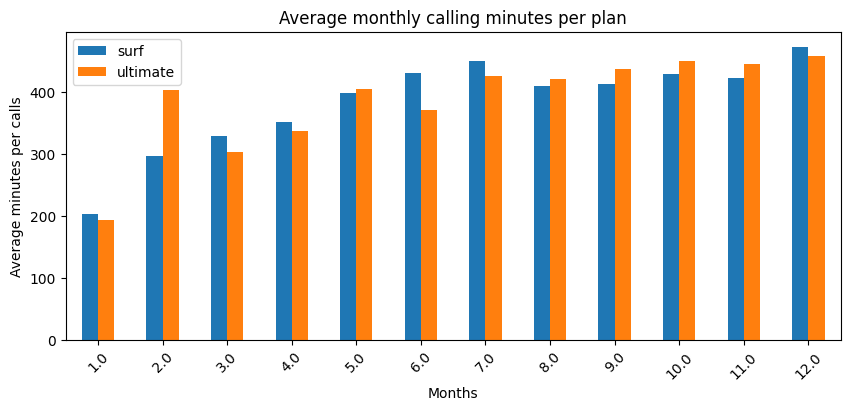

month,plan,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,surf,203.0,297.000000,330.00,351.540000,399.584416,431.298969,449.983471,410.111111,414.226804,429.729958,423.325088,473.836478
1,ultimate,193.5,403.142857,304.25,336.857143,406.241379,370.957447,427.067797,421.436620,437.511628,450.735849,445.196850,459.099338


In [38]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
group_date_plans_surf= group_date_plans[group_date_plans['plan']== 'surf'] #Filtramos para obtener solo los datos del plan Surf.
group_date_plans_ultimate= group_date_plans[group_date_plans['plan']== 'ultimate'] #Filtramos para obtener solo los datos del plan Ultimate.
grouped_data_surf = group_date_plans_surf.groupby("month")["duration"].mean() #Agrupamos los datos el plan Surf por mes y la duracion media de llamadas por mes.
grouped_data_ultimate = group_date_plans_ultimate.groupby("month")["duration"].mean() #Agrupamos los datos el plan Ultimate por mes y la duracion media de llamadas por mes
group_month = pd.concat([grouped_data_surf.rename('surf'), grouped_data_ultimate.rename('ultimate')], axis='columns') #Juntamos las dos agrupaciones de datos 'Surf' y 'Ultimate' con el metodo concat()
group_month.plot(xlim=[0,23], ylabel='Average minutes per calls', xlabel='Months', kind='bar', title='Average monthly calling minutes per plan', rot=45, figsize=[10, 4]) #Generamos la Visualizacion con el nuevo Dataframe 'group_month' 
plt.show() #Imprimimos la Visualizacion.

print()
monthly_consumption = group_date_plans.groupby(['plan', 'month'])['duration'].mean().unstack().reset_index() #Aca simplemente observamos cada media mensual de llamas sin el grafico para saber con exactitud cual es la media de cada mes y plan.
monthly_consumption #Lo imprimimos. 

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos observar en los datos y la visualizacion que el promedio mensual de minutos por llamadas entre el plan surf y el plan Ultimate son parecidos. El rango de duracion media entre ambos planes esta entre 194 y menos de 475 minutos de forma creciente desde el mes 1 (enero).

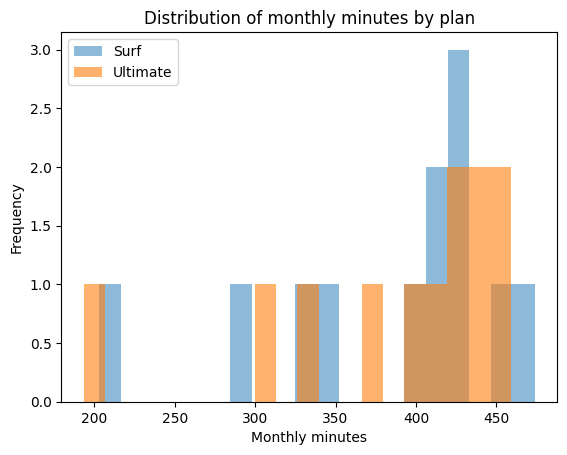

In [39]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
 
# Creamos un histograma para cada plan y los datos de Duracion de cada llamada por cliente.
plt.hist(grouped_data_surf, alpha=0.5, label='Surf', bins=20)
plt.hist(grouped_data_ultimate, alpha=0.6, label='Ultimate', bins=20)

# Agregamos las etiquetas y título
plt.xlabel('Monthly minutes')
plt.ylabel('Frequency')
plt.title('Distribution of monthly minutes by plan')

# Agregamos la leyenda y mostramos el histograma
plt.legend()
plt.show()

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Como podemos ver en el histograma, los usuarios del plan Surf, tienen el mayor tiempo de llamada al rededor de 475 minutos, el maximo de usurios se puede apreciar que es alrededor de los 425 min En el caso de los usuarios Ultimate podemos observar todo lo contrario el maximo es entre de los 425 y menos de 460. por ende los usuarios de esta muestra del plan Ultimate no llegan a consumir ni el 16% del total del limite de su plan que son (3000 min/mensuales).

Debemos tener en cuenta que este es un analisis a una pequeña muestra de 500 clientre entre los cuales se encuentran clientes tanto del plan surf (339 usuarios) y del Ultimate (161 usuarios).

Por lo cual podemos llegar a una supuesta conclusion de la muestra analizada que los clientes tanto del plan Surf como del plan Ultimate necesitan al rededor de 475 min de llamadas mensuales.

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [40]:
# Calcula la media y la varianza de la duración mensual de llamadas.

monthly_call_duration_surf = group_date_plans[group_date_plans['plan']== 'surf'].groupby('month')['duration'].agg(['mean', 'var', 'std']).reset_index() #Agrupamos los datos con el metodo 'groupby' y utilizamos el metodo 'agg' para realizar los distintos analisis a la columna 'duration' del plan Surf
print('PLAN SURF:')
print(monthly_call_duration_surf.head(12))

monthly_call_duration_ultimate = group_date_plans[group_date_plans['plan']== 'ultimate'].groupby('month')['duration'].agg(['mean', 'var', 'std',]).reset_index() #Agrupamos los datos con el metodo 'groupby' y utilizamos el metodo 'agg' para realizar los distintos analisis a la columna 'duration' del plan Surf
print()
print('PLAN ULTIMATE:')
print(monthly_call_duration_ultimate.head(12))

PLAN SURF:
    month        mean           var         std
0     1.0  203.000000  15842.000000  125.865007
1     2.0  297.000000  52226.500000  228.531179
2     3.0  330.000000  35809.363636  189.233622
3     4.0  351.540000  50866.743265  225.536567
4     5.0  399.584416  59754.219754  244.446763
5     6.0  431.298969  45592.628436  213.524304
6     7.0  449.983471  61005.099725  246.992105
7     8.0  410.111111  54344.645963  233.119381
8     9.0  414.226804  46595.958656  215.860971
9    10.0  429.729958  52278.664056  228.645280
10   11.0  423.325088  51607.021602  227.171789
11   12.0  473.836478  63629.518918  252.248923

PLAN ULTIMATE:
    month        mean           var         std
0     1.0  193.500000  16572.333333  128.733575
1     2.0  403.142857  76889.476190  277.289517
2     3.0  304.250000  61984.931818  248.967732
3     4.0  336.857143  34888.928571  186.785783
4     5.0  406.241379  43841.046798  209.382537
5     6.0  370.957447  42503.563367  206.163924
6     7.0  42

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

En general, la varianza y la desviación estándar de ambos planes son significativamente altas, lo que nos indica que la distribución de datos está lejos de la media. podemos observar en los datos analizados que los clientes de distintos planes se comportan de manera muy similar al realizar sus llamadas.

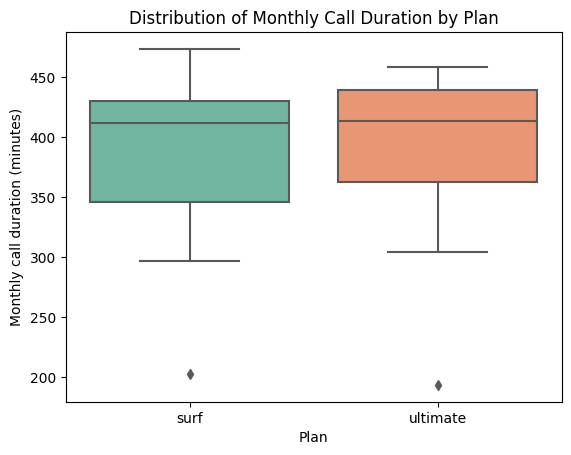

In [41]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
monthly_consumption_1 = group_date_plans.groupby(['plan', 'month'])['duration'].mean().reset_index() #Agrupamos los datos por las columnas que nos interesan y le aplicamos el metodo 'mean'.

sns.boxplot(x="plan", y="duration", data=monthly_consumption_1, palette="Set2") #Creamos el diagrama de caja
plt.xlabel("Plan")
plt.ylabel("Monthly call duration (minutes)")
plt.title("Distribution of Monthly Call Duration by Plan")
plt.show() #lo imprimimos

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

## Conclusiones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Con el diagrama de caja podemos terminar de concluir que todos nuestras observaciones anteriores son correctas, los usuarios tanto del plan Surf como del plan Ultimate se comportan de manera similar respecto a las llamadas. el minimo del plan ultimate, esta ligeramente por encima del minimo del plan surf, el Q1 (25% de los datos) del plan Ultimate podemos observar que esta un poco por encima del Q1 del Plan Surf, Lo mismo pasa con Q2(la mediana) y Q3 (75% de los datos) el maximo del plan ultimate esta por debajo del plan surf.

Eso quiere decir que los usuarios del plan Surf tienden a consumir más minutos de llamadas en general que los usuarios del plan Ultimate.

### Mensajes

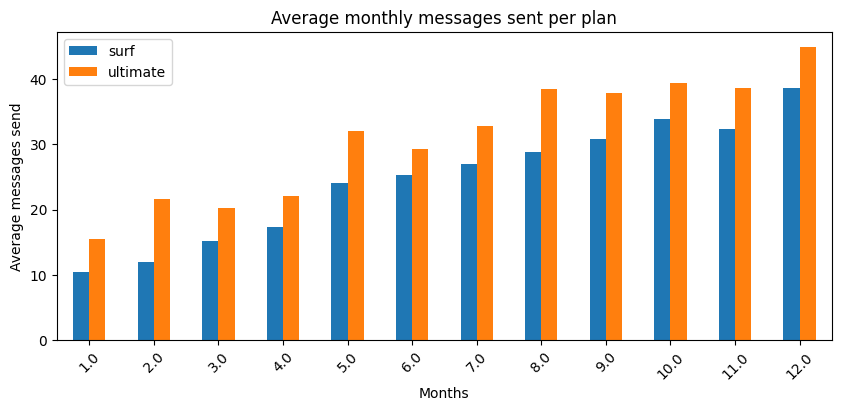

month,plan,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,surf,10.5,12.000000,15.26087,17.400000,24.012987,25.298969,27.033058,28.777778,30.762887,33.839662,32.385159,38.600629
1,ultimate,15.5,21.571429,20.25000,22.047619,32.103448,29.340426,32.830508,38.478873,37.895349,39.443396,38.606299,45.006623


In [42]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

group_date_plans_surf= group_date_plans[group_date_plans['plan']== 'surf'] #Filtramos para obtener solo los datos del plan Surf.
group_date_plans_ultimate= group_date_plans[group_date_plans['plan']== 'ultimate'] #Filtramos para obtener solo los datos del plan Ultimate.
grouped_data_surf = group_date_plans_surf.groupby("month")["number_messages_sent"].mean() #Agrupamos los datos el plan Surf y la cantidad de mensajes enviados por mes. Le sacamos el promedio
grouped_data_ultimate = group_date_plans_ultimate.groupby("month")["number_messages_sent"].mean() #Agrupamos los datos el plan Surf por mes y la cantidad de mensajes enviados por mes. Le sacamos el promedio
group_month = pd.concat([grouped_data_surf.rename('surf'), grouped_data_ultimate.rename('ultimate')], axis='columns') #Juntamos las dos agrupaciones de datos 'Surf' y 'Ultimate' con el metodo concat()
group_month.plot(xlim=[0,23], ylabel='Average messages send', xlabel='Months', kind='bar', title='Average monthly messages sent per plan', rot=45, figsize=[10, 4]) #Generamos la Visualizacion de barras con el nuevo Dataframe 'group_month' 
plt.show()

print()
monthly_consumption_2= group_date_plans.groupby(['plan', 'month'])['number_messages_sent'].mean().unstack().reset_index() #Aca simplemente observamos cada media mensual de llamas sin el grafico para saber con exactitud cual es la media de cada mes y plan.
monthly_consumption_2 #lo imprimimos

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos observar en los datos y la visualizacion que promedio mensual de mensajes enviados entre el plan surf y el plan Ultimate son parecidos. El rango de mensajes enviados media entre ambos planes esta entre 10 y menos de 46 mensajes. De forma creciente desde el mes 1 (Enero).

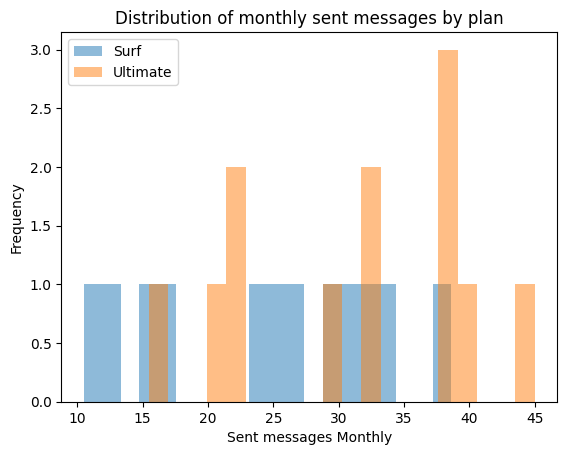

In [43]:
# Compara la cantidad de mensajes enviados por usuarios por plan

# Creamos un histograma para cada plan y los datos de mensajes enviados por cliente.
plt.hist(grouped_data_surf, alpha=0.5, label='Surf', bins=20)
plt.hist(grouped_data_ultimate, alpha=0.5, label='Ultimate', bins=20)

# Agregamos las etiquetas y título
plt.xlabel('Sent messages Monthly')
plt.ylabel('Frequency')
plt.title('Distribution of monthly sent messages by plan')

# Agregamos la leyenda y mostramos el histograma
plt.legend()
plt.show()

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Como podemos ver en el histograma, los usuarios del plan Surf, la gran mayoria de este muestra se mantiene en el rango de su limite de consumo mesual (50 mensajes) ya que el maximo de mensajes enviados esta por debajo de los 40 mensajes. En el caso de los usuarios Ultimate podemos observar que el maximo es menos de 45 mensajes enviados, esta por encima de los usuarios del plan surf. por ende la gran mayoria de los usuarios de esta muestra del plan Ultimate no llegan a consumir ni un 5% del total del limite de su plan que son (1000 mensajes/mensuales).

Debemos tener en cuenta que este es un analisis a una pequeña muestra de 500 clientre entre los cuales se encuentran clientes tanto del plan surf (339 usuarios) y del Ultimate (161 usuarios).

Por lo cual podemos llegar a una supuesta conclusion de la muestra analizada que los clientes tanto del plan Surf como del plan Ultimate necesitan al rededor de 45 mensajes mensuales y que los usuarios del plan Ultimate tienden a enviar mas mensajes.

In [44]:
# Calcula la media y la varianza de la duración mensual de mensajes.

print('PLAN SURF:')
monthly_message_duration_surf = group_date_plans[group_date_plans['plan']== 'surf'].groupby('month')['number_messages_sent'].agg(['mean', 'var', 'std']) #Agrupamos los datos con el metodo 'groupby' y utilizamos el metodo 'agg' para realizar los distintos analisis a la columna 'number_messages_sent' del plan Surf
print(monthly_message_duration_surf.head(12))
print()
print('PLAN ULTIMATE:')
monthly_message_duration_ultimate = group_date_plans[group_date_plans['plan']== 'ultimate'].groupby('month')['number_messages_sent'].agg(['mean', 'var', 'std']) #Agrupamos los datos con el metodo 'groupby' y utilizamos el metodo 'agg' para realizar los distintos analisis a la columna 'number_messages_sent' del plan Ultimate
print(monthly_message_duration_surf.head(12))
print(monthly_message_duration_ultimate.head(12))

PLAN SURF:
            mean          var        std
month                                   
1.0    10.500000   220.500000  14.849242
2.0    12.000000   386.000000  19.646883
3.0    15.260870   346.565217  18.616262
4.0    17.400000   501.591837  22.396246
5.0    24.012987   847.197198  29.106652
6.0    25.298969   914.920103  30.247646
7.0    27.033058   923.915565  30.395979
8.0    28.777778  1029.515528  32.086064
9.0    30.762887  1003.829496  31.683268
10.0   33.839662  1275.465708  35.713663
11.0   32.385159  1065.344034  32.639608
12.0   38.600629  1458.158612  38.185843

PLAN ULTIMATE:
            mean          var        std
month                                   
1.0    10.500000   220.500000  14.849242
2.0    12.000000   386.000000  19.646883
3.0    15.260870   346.565217  18.616262
4.0    17.400000   501.591837  22.396246
5.0    24.012987   847.197198  29.106652
6.0    25.298969   914.920103  30.247646
7.0    27.033058   923.915565  30.395979
8.0    28.777778  1029.515528 

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

En general, la varianza y la desviación estándar de ambos planes son altas, lo que nos indica que la distribución de datos está lejos de la media. podemos observar en los datos analizados que los clientes de distintos planes se comportan de manera un poco similar al enviar mensajes.

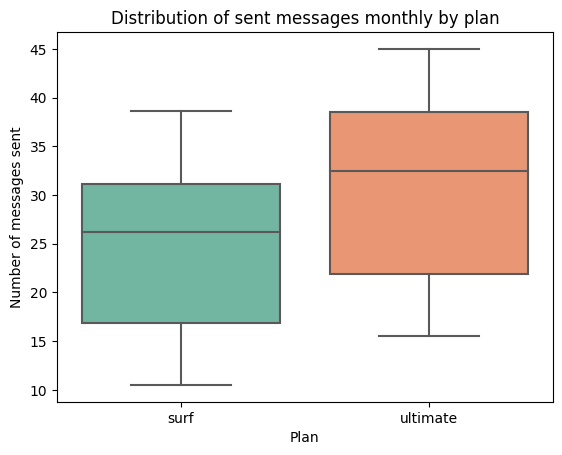

In [45]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de mensajes

monthly_consumption_3= group_date_plans.groupby(['plan', 'month'])['number_messages_sent'].mean().reset_index() #Agrupamos los datos por las columnas que nos interesan y le aplicamos el metodo 'mean'. y reset_index() 

sns.boxplot(x="plan", y="number_messages_sent", data=monthly_consumption_3, palette="Set2") #Creamos el diagrama de caja
plt.xlabel("Plan")
plt.ylabel("Number of messages sent")
plt.title("Distribution of sent messages monthly by plan")
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

##  Conclusiones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

En general, el envio de los mensajes es mayor en el plan Ultimate que en el plan Surf. La mediana de envio de los mensajes en el plan Ultimate es de aproximadamente 34 mensajes, mientras que en el plan Surf es de aproximadamente 27 mensajes.
La caja del plan Ultimate es más amplia que la del plan Surf, lo que indica que existe una mayor dispersión en el envio de mensajes en este plan.


### Internet

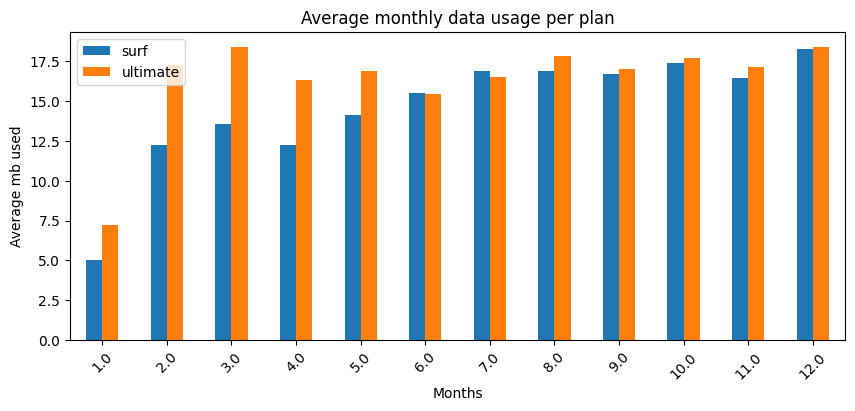

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
plan,,,,,,,,,,,,
surf,5.00,12.222222,13.565217,12.220000,14.116883,15.484536,16.876033,16.882716,16.690722,17.409283,16.431095,18.238994
ultimate,7.25,17.285714,18.416667,16.333333,16.862069,15.425532,16.491525,17.845070,17.011628,17.716981,17.118110,18.397351


In [46]:
# Comprara la cantidad de datos que tienden a utilizar cada mes los usuarios de cada plan

group_date_plans_surf= group_date_plans[group_date_plans['plan']== 'surf'] #Filtramos para obtener solo los datos del plan Surf
group_date_plans_ultimate= group_date_plans[group_date_plans['plan']== 'ultimate'] #Filtramos para obtener solo los datos del plan Ultimate.
grouped_data_surf = group_date_plans_surf.groupby("month")["gb_used"].mean().sort_values() #Agrupamos los datos el plan Surf y la cantidad de mensajes enviados por mes. Le sacamos el promedio
grouped_data_ultimate = group_date_plans_ultimate.groupby("month")["gb_used"].mean().sort_values() #Agrupamos los datos el plan Surf por mes y la cantidad de mensajes enviados por mes. Le sacamos el promedio
group_month = pd.concat([grouped_data_surf.rename('surf'), grouped_data_ultimate.rename('ultimate')], axis='columns') #Juntamos las dos agrupaciones de datos 'Surf' y 'Ultimate' con el metodo concat()
group_month.plot(xlim=[0,23], ylabel='Average mb used', xlabel='Months', kind='bar', title='Average monthly data usage per plan', rot=45, figsize=[10, 4]) #Generamos la Visualizacion de barras con el nuevo Dataframe 'group_month'
plt.show() #Imprimimos el grafico

print()
monthly_consumption_4 = group_date_plans.groupby(['plan', 'month'])['gb_used'].mean().unstack() #Aca simplemente observamos cada media mensual de llamas sin el grafico para saber con exactitud cual es la media de cada mes y plan.
monthly_consumption_4

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos observar en los datos y la visualizacion que promedio mensual de datos consumidos entre el plan surf y el plan Ultimate son parecidos. El rango de Datos consumidos entre ambos planes esta entre 12 y menos de 19 GB. De forma creciente desde el mes 1 (Enero).

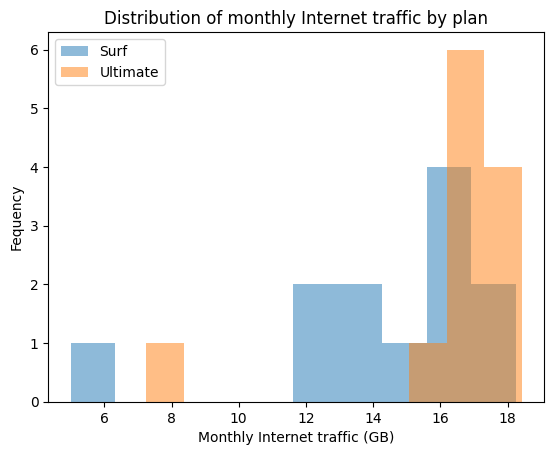

In [47]:
# Creamos un histogramas para cada plan.
plt.hist(grouped_data_surf, alpha=0.5, label='Surf')
plt.hist(grouped_data_ultimate, alpha=0.5, label='Ultimate')

# Agregamos etiquetas y título
plt.xlabel('Monthly Internet traffic (GB)')
plt.ylabel('Fequency')
plt.title('Distribution of monthly Internet traffic by plan')

# Agregamo leyenda y mostramos el histograma
plt.legend()
plt.show()

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos observar en el histograma que los clientes del plan surf una gran mayoria excede el limite de consumo que es (15 GB), en el plan ultimate podemos observar que la mayoria de clientes consume menos de 19 GB, pero el rango de consumo del plan ultimate es mayor que el de los usuarios del plan surf. por ende los usuarios de esta muestra del plan Ultimate llegan a consumir el 63% del total del limite de su plan que son (30 GB/mensuales).

Debemos tener en cuenta que este es un analisis a una pequeña muestra de 500 clientre entre los cuales se encuentran clientes tanto del plan surf (339 usuarios) y del Ultimate (161 usuarios).

Por lo cual podemos llegar a una supuesta conclusion de la muestra analizada que los clientes tanto del plan Surf como del plan Ultimate necesitan al rededor de 19 GB mensuales y que los usuarios del plan Ultimate tienden a enviar mas mensajes.

In [48]:
# Calcula la media y la varianza de Datos consumidos mensualmente.
print('PLAN SURF:')
monthly_internet_duration_surf = group_date_plans[group_date_plans['plan']== 'surf'].groupby('month')['gb_used'].agg(['mean', 'var', 'std']) #Agrupamos los datos con el metodo 'groupby' y utilizamos el metodo 'agg' para realizar los distintos analisis a la columna 'number_messages_sent' del plan Surf
print(monthly_internet_duration_surf.head(12))
print()
print('PLAN ULTIMATE:')
monthly_internet_duration_ultimate = group_date_plans[group_date_plans['plan']== 'ultimate'].groupby('month')['gb_used'].agg(['mean', 'var', 'std']) #Agrupamos los datos con el metodo 'groupby' y utilizamos el metodo 'agg' para realizar los distintos analisis a la columna 'number_messages_sent' del plan Ultimate
print(monthly_internet_duration_ultimate.head(12))

PLAN SURF:
            mean        var       std
month                                
1.0     5.000000  18.000000  4.242641
2.0    12.222222  41.444444  6.437736
3.0    13.565217  63.984190  7.999012
4.0    12.220000  56.215918  7.497728
5.0    14.116883  58.183527  7.627813
6.0    15.484536  47.752363  6.910308
7.0    16.876033  61.476171  7.840674
8.0    16.882716  71.420942  8.451091
9.0    16.690722  49.240639  7.017167
10.0   17.409283  60.725846  7.792679
11.0   16.431095  54.607824  7.389711
12.0   18.238994  69.210841  8.319305

PLAN ULTIMATE:
            mean         var        std
month                                  
1.0     7.250000   14.916667   3.862210
2.0    17.285714   37.904762   6.156684
3.0    18.416667  138.628788  11.774073
4.0    16.333333   85.833333   9.264628
5.0    16.862069   54.194581   7.361697
6.0    15.425532   68.858464   8.298100
7.0    16.491525   64.254237   8.015874
8.0    17.845070   58.047082   7.618864
9.0    17.011628   47.258687   6.874495
1

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

En general, la varianza y la desviación estándar de ambos planes son altas, lo que nos indica que la distribución de datos está lejos de la media. podemos observar en los datos analizados que los clientes de distintos planes se comportan de manera un poco similar al consumir datos de internet.

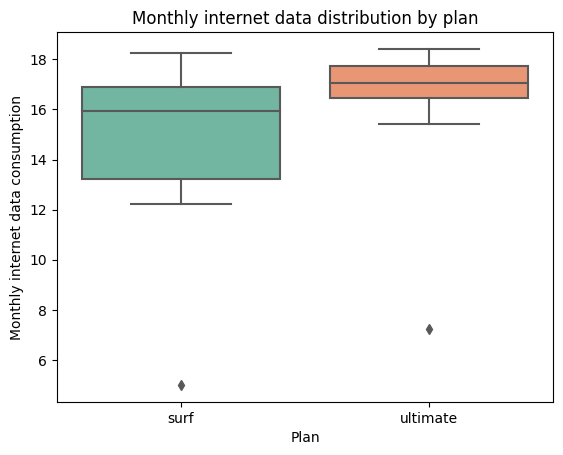

In [49]:
# Traza un diagrama de caja para visualizar la distribución de datos mensual de intermet

monthly_consumption_5 = group_date_plans.groupby(['plan', 'month'])['gb_used'].mean().reset_index()

sns.boxplot(x="plan", y='gb_used', data=monthly_consumption_5, palette="Set2")
plt.xlabel("Plan")
plt.ylabel("Monthly internet data consumption")
plt.title("Monthly internet data distribution by plan")
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

##  Conclusiones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos observar en el diagrama de caja que los usurios surf tienen mayor consumo de datos de internet ya que su iqr es mucho mas amplio que el de los usurios del plan ultimate lo que indica que existe una mayor dispersión en el consumo de datos en este plan. Vemos la presencia de algunos valores atipicos en ambos planes. La mediana de consumo de datos de internet en el plan Ultimate es de aproximadamente 17 GB, mientras que en el plan Surf es de 16 GB.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [50]:
# Calcula las medidas de tendencia central y dispersión de los ingresos mensuales por plan

income_surf= group_date_plans[group_date_plans['plan']== 'surf'] #Filtrmoa cada los datos para el plan surf
income_ultimate= group_date_plans[group_date_plans['plan']== 'ultimate'] #Filtrmoa cada los datos para el plan ultimate

monthly_income_surf = income_surf.groupby('month')['ingresos_totales'].agg(['mean', 'std', 'var', 'sum']) #Agrupamos los datos por mes y ingresos totales del plan surf, le aplicamos el metodo (agg()) para realizarle distintos calculos a los datos.
print(monthly_income_surf.head(12))
print()
monthly_income_ultimate = group_date_plans.groupby('month')['ingresos_totales'].agg(['mean', 'std', 'var', 'sum']) #Agrupamos los datos por mes y ingresos totales del plan ultimate, le aplicamos el metodo (agg()) para realizarle distintos calculos a los datos.
print(monthly_income_ultimate.head(12))



            mean        std          var       sum
month                                             
1.0    20.000000   0.000000     0.000000     40.00
2.0    33.333333  21.213203   450.000000    300.00
3.0    43.919565  39.628765  1570.438977   1010.15
4.0    38.809000  35.264683  1243.597854   1940.45
5.0    44.171039  44.531573  1983.060965   3401.17
6.0    46.920515  44.289974  1961.601840   4551.29
7.0    58.859091  54.183667  2935.869768   7121.95
8.0    61.618642  59.400046  3528.365515   9982.22
9.0    55.581237  48.129594  2316.457864  10782.76
10.0   62.843333  56.019228  3138.153931  14893.87
11.0   54.854558  50.445208  2544.719037  15523.84
12.0   67.062233  67.197359  4515.485046  21325.79

            mean        std          var       sum
month                                             
1.0    53.333333  25.819889   666.666667    320.00
2.0    49.375000  24.349880   592.916667    790.00
3.0    53.461429  34.627282  1199.048654   1871.15
4.0    48.231690  32.957593  1

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Los ingresos mensuales de ambos planes tienen una gran variación.

In [51]:
#comparando los ingresos mensuales medios por mes, plan y por usuario

revenue_pivot = group_date_plans.pivot_table(index='month',
                                columns='plan',                 #Implemetamos en este caso la pivot_table en vez de sacar la media como lo veniamos haciendo para ver la media de cada mes.
                                values='ingresos_totales')
revenue_pivot

plan,surf,ultimate
month,,
1.0,20.000000,70.000000
2.0,33.333333,70.000000
3.0,43.919565,71.750000
4.0,38.809000,70.666667
5.0,44.171039,70.482759
6.0,46.920515,70.297872
7.0,58.859091,70.237288
8.0,61.618642,70.690141
9.0,55.581237,70.406977


## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos ver que el plan surf su media excede los 20 va en forma creciente desde el mes 1 al 12 hasta alrededor de los 67. en cambio el plan ultimate su su media se mantiene en los 70 maximo casi 72

In [52]:
compare = group_date_plans.groupby('plan')['ingresos_totales'].agg(['sum', 'mean', 'median']) #Ahora observamos la suma la media y la mediana de cada plan con el metodo agg
compare

,sum,mean,median
plan,,,
surf,90993.49,57.627289,40.0
ultimate,51016.00,70.464088,70.0


## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos observar en los ingresos de ambos planes de esta muestra que el plan surf genera mayores ingresos que el plan ultimate, la media y la mediana del plan surf supera el pago mensual de cada cliente el cual son 20, en cambio el plan ultimate vemos que su media y su mediana se mantiene en los 70 lo que quiere decir que la mayoria de los usuarios de este plan se mantienen dentro de los limites de consumo. 

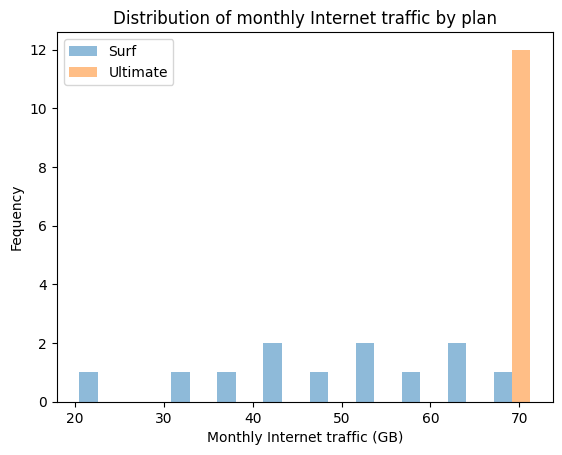

In [53]:
# Creamos un histogramas para cada plan.
plt.hist(revenue_pivot, alpha=0.5, label=('Surf', 'Ultimate'))


# Agregamos etiquetas y título
plt.xlabel('Monthly Internet traffic (GB)')
plt.ylabel('Fequency')
plt.title('Distribution of monthly Internet traffic by plan')

# Agregamo leyenda y mostramos el histograma
plt.legend()
plt.show()



## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Con el histograma podemos observar que efectivamente los ingresos de los usuarios surf son mayores y diversos que los del plan ultimate.

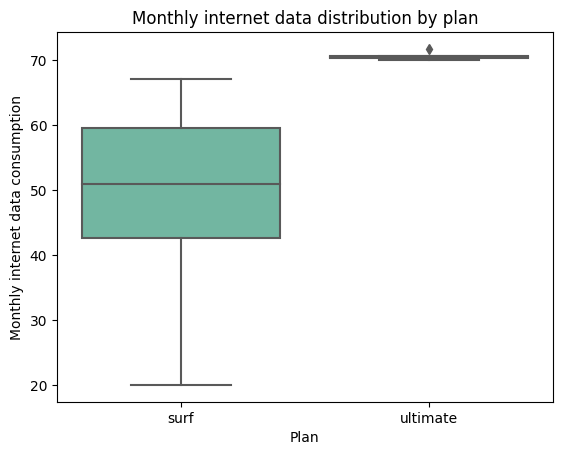

In [54]:
monthly_consumption_6 = group_date_plans.groupby(['plan', 'month'])['ingresos_totales'].mean().reset_index()

sns.boxplot(x="plan", y='ingresos_totales', data=monthly_consumption_6, palette="Set2")
plt.xlabel("Plan")
plt.ylabel("Monthly internet data consumption")
plt.title("Monthly internet data distribution by plan")
plt.show()

## Observaciones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Con el diagrama de caja tambien notamos y comprobamos lo mismo, Los datos de los usuarios del plan Surf están más dispersos, mientras que la mayoría de los usuarios del plan Ultimate rondan los 70, sin embargo, el rango es muy pequeño.

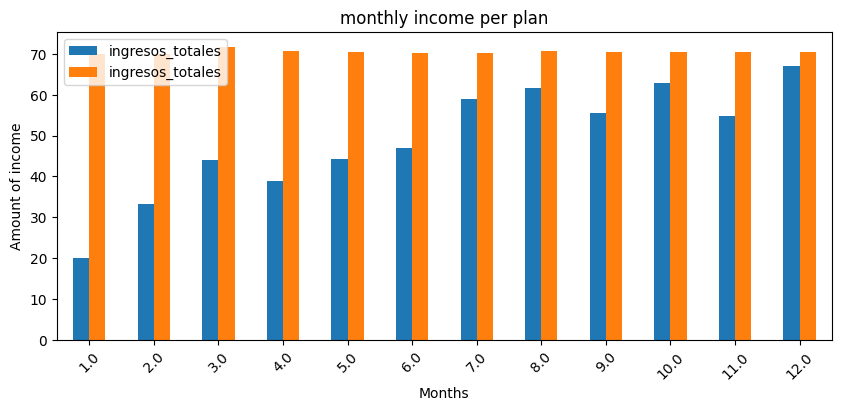

In [55]:
monthly_income_surf = income_surf.groupby('month')['ingresos_totales'].mean()
monthly_income_ultimate = income_ultimate.groupby('month')['ingresos_totales'].mean()


group_ingresos = pd.concat([monthly_income_surf, monthly_income_ultimate], axis=1)

group_ingresos.plot(ylabel='Amount of income', xlabel='Months', kind='bar', title='monthly income per plan', rot=45, figsize=[10, 4])
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

##  Conclusiones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Los usuarios del plan Ultimate podemos observar que los ingresos por usuario son de alrededor de 70$. El rango de usuarios del Plan Surf es más amplio. Podemos inferir que más ingresos provienen de los usuarios del plan Surf. 

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [56]:
# Prueba las hipótesis
# Creamos una funcion de prueba estadística: prueba t de dos muestras

def t_test(sample1, sample2, alpha):
    p_value_levene=st.levene(sample1, sample2).pvalue.astype(int)

    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True

    p_value=st.ttest_ind(sample1, sample2, nan_policy='omit', equal_var=option_var).pvalue.astype(int)
    if p_value<alpha:
        print('Rechazamos la hipótesis nula: el promedio de la muestra 1 no es igual al promedio de la muestra 2')
    else:
        print( "No rechazar la hipótesis nula: No tenemos evidencia suficiente para decir que los promedios de la muestra 1 \
        y la muestra 2 no son iguales")

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo!! Es importante mostrar si se cumplen los supuestos cuandor realizamos pruebas de hipótesis.
</div>

In [57]:
# mirando solo el valor p
st.ttest_ind(revenue_pivot['surf'], revenue_pivot['ultimate']).pvalue

2.054782336539126e-05

In [58]:
#aplicamos t_test a la tabla ingresos_pivot para ambos planes
alpha= 0.05
t_test(revenue_pivot['surf'], revenue_pivot['ultimate'], alpha)

Rechazamos la hipótesis nula: el promedio de la muestra 1 no es igual al promedio de la muestra 2


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la prueba de hipótesis
</div>

##  Conclusiones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos concluir de esta prueba que la hipótesis alternativa es cierta: los ingresos promedio de los usuarios de los planes de llamadas Ultimate y Surf difieren.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [59]:
# Prueba las hipótesis

income_nynj = group_date_plans.query('city == "New York Newark Jersey City, NY NJ PA MSA"')
income_others = group_date_plans.query('city != "New York Newark Jersey City, NY NJ PA MSA"')

In [60]:
# Miramos el valor p
st.ttest_ind(income_nynj['ingresos_totales'], income_others['ingresos_totales']).pvalue

0.03703108669552464

In [61]:
#Aplicamos T-Test en la función definida anteriormente
t_test(income_nynj['ingresos_totales'], income_others['ingresos_totales'], alpha)

Rechazamos la hipótesis nula: el promedio de la muestra 1 no es igual al promedio de la muestra 2


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la prueba de hipótesis. 
</div>

##  Conclusiones:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Podemos concluir de esta prueba que la hipótesis alternativa es cierta: el ingreso promedio de los usuarios en el área NY-NJ es diferente al de los usuarios en otras regiones.

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

##  Conclusiones Generales:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

## Estudios a ambos planes en conjunto (SURF, ULTIMATE)


### Llamadas

###### Llamadas hechas por cada usuario al mes

Como pudimos observar, La mayoría de los usuarios realizan entre 40 y 80 llamadas al mes.

######  Cantidad de minutos usados por cada usuario al mes.

Pudimos observar en nuestro histograma que la mayoría de los usuarios pasan entre unos 300 y casi 600 minutos al teléfono al mes.

### Internet

###### Volumen del tráfico de Internet usado por cada usuario al mes

Como pudimos ver en nuestro histograma, La mayoría de los usuarios utilizan entre 15 y 20 GB de datos al mes.

### Mensajes

######  Número de mensajes enviados por cada usuario al mes.

Pudimos observar en nuestro histograma que La mayoría de los usuarios envían entre 0 y 50 mensajes de texto al mes.


## Estudios a los planes por separado.

### Llamadas

###### la duración promedio de llamadas por cada plan y por cada mes.

Pudimos observar en los datos y la visualizacion que el promedio mensual de minutos por llamadas entre el plan surf y el plan Ultimate son parecidos. El rango de duracion media entre ambos planes esta entre 194 y menos de 475 minutos de forma creciente desde el mes 1 (enero).

###### Número de minutos mensuales que necesitan los usuarios de cada plan.

Como pudimos ver en el histograma, los usuarios del plan Surf, tienen el mayor tiempo de llamada al rededor de 475 minutos, el maximo de usuarios se puede apreciar que es alrededor de los 425 min En el caso de los usuarios Ultimate podemos observar todo lo contrario el maximo es entre de los 425 y menos de 460. por ende los usuarios de esta muestra del plan Ultimate no llegan a consumir ni el 16% del total del limite de su plan que son (3000 min/mensuales).

Debemos tener en cuenta que este es un analisis a una pequeña muestra de 500 clientre entre los cuales se encuentran clientes tanto del plan surf (339 usuarios) y del Ultimate (161 usuarios).

Por lo cual podemos llegar a una supuesta conclusion de la muestra analizada que los clientes tanto del plan Surf como del plan Ultimate necesitan al rededor de 475 min de llamadas mensuales.

###### La media y la varianza de la duración mensual de llamadas.

En general, la varianza y la desviación estándar de ambos planes son significativamente altas, lo que nos indica que la distribución de datos está lejos de la media. podemos observar en los datos analizados que los clientes de distintos planes se comportan de manera muy similar al realizar sus llamadas.

###### La distribución de la duración mensual de llamadas.

Con el diagrama de caja podemos terminar de concluir que todos nuestras observaciones anteriores son correctas, los usuarios tanto del plan Surf como del plan Ultimate se comportan de manera similar respecto a las llamadas. el minimo del plan ultimate, esta ligeramente por encima del minimo del plan surf, el Q1 (25% de los datos) del plan Ultimate podemos observar que esta un poco por encima del Q1 del Plan Surf, Lo mismo pasa con Q2(la mediana) y Q3 (75% de los datos) el maximo del plan ultimate esta por debajo del plan surf.

Eso quiere decir que los usuarios del plan Surf tienden a consumir más minutos de llamadas en general que los usuarios del plan Ultimate.

### Mensajes

###### Número de mensajes que tienden a enviar cada mes los usuarios de cada plan.

Pudimos observar en los datos y la visualizacion que promedio mensual de mensajes enviados entre el plan surf y el plan Ultimate son parecidos. El rango de mensajes enviados media entre ambos planes esta entre 10 y menos de 46 mensajes. De forma creciente desde el mes 1 (Enero).

###### Cantidad de mensajes enviados por usuarios por plan.

Como pudimos ver en el histograma, los usuarios del plan Surf, la gran mayoria de este muestra se mantiene en el rango de su limite de consumo mesual (50 mensajes) ya que el maximo de mensajes enviados esta por debajo de los 40 mensajes. En el caso de los usuarios Ultimate podemos observar que el maximo es menos de 45 mensajes enviados, esta por encima de los usuarios del plan surf. por ende la gran mayoria de los usuarios de esta muestra del plan Ultimate no llegan a consumir ni un 5% del total del limite de su plan que son (1000 mensajes/mensuales).

Debemos tener en cuenta que este es un analisis a una pequeña muestra de 500 clientre entre los cuales se encuentran clientes tanto del plan surf (339 usuarios) y del Ultimate (161 usuarios).

Por lo cual podemos llegar a una supuesta conclusion de la muestra analizada que los clientes tanto del plan Surf como del plan Ultimate necesitan al rededor de 45 mensajes mensuales y que los usuarios del plan Ultimate tienden a enviar mas mensajes.

###### La media y la varianza de la duración mensual de mensajes.

En general, la varianza y la desviación estándar de ambos planes son altas, lo que nos indica que la distribución de datos está lejos de la media. podemos observar en los datos analizados que los clientes de distintos planes se comportan de manera un poco similar al enviar mensajes.

###### La distribución de la duración mensual de mensajes.

En general, el envio de los mensajes es mayor en el plan Ultimate que en el plan Surf. La mediana de envio de los mensajes en el plan Ultimate es de aproximadamente 34 mensajes, mientras que en el plan Surf es de aproximadamente 27 mensajes. La caja del plan Ultimate es más amplia que la del plan Surf, lo que indica que existe una mayor dispersión en el envio de mensajes en este plan.

### Internet

###### Cantidad de datos que tienden a utilizar cada mes los usuarios de cada plan

Podemos observar en los datos y la visualizacion que promedio mensual de datos consumidos entre el plan surf y el plan Ultimate son parecidos. El rango de Datos consumidos entre ambos planes esta entre 12 y menos de 19 GB. De forma creciente desde el mes 1 (Enero).

###### Distribucion del trafico de internet mensual para cada plan.

Pudimos observar en el histograma que los clientes del plan surf una gran mayoria excede el limite de consumo que es (15 GB), en el plan ultimate podemos observar que la mayoria de clientes consume menos de 19 GB, pero el rango de consumo del plan ultimate es mayor que el de los usuarios del plan surf. por ende los usuarios de esta muestra del plan Ultimate llegan a consumir el 63% del total del limite de su plan que son (30 GB/mensuales).

Debemos tener en cuenta que este es un analisis a una pequeña muestra de 500 clientre entre los cuales se encuentran clientes tanto del plan surf (339 usuarios) y del Ultimate (161 usuarios).

Por lo cual podemos llegar a una supuesta conclusion de la muestra analizada que los clientes tanto del plan Surf como del plan Ultimate necesitan al rededor de 19 GB mensuales y que los usuarios del plan Ultimate tienden a enviar mas mensajes.

###### La media y la varianza de Datos consumidos mensualmente.

En general, la varianza y la desviación estándar de ambos planes son altas, lo que nos indica que la distribución de datos está lejos de la media. podemos observar en los datos analizados que los clientes de distintos planes se comportan de manera un poco similar al consumir datos de internet.

###### La distribución de datos mensual de intermet

Pudimos observar en el diagrama de caja que los usurios surf tienen mayor consumo de datos de internet ya que su iqr es mucho mas amplio que el de los usurios del plan ultimate lo que indica que existe una mayor dispersión en el consumo de datos en este plan. Vemos la presencia de algunos valores atipicos en ambos planes. La mediana de consumo de datos de internet en el plan Ultimate es de aproximadamente 17 GB, mientras que en el plan Surf es de 16 GB.


## Ingresos

Podemos observar en los ingresos de ambos planes de esta muestra que el plan surf genera mayores ingresos que el plan ultimate, la media y la mediana del plan surf supera el pago mensual de cada cliente el cual son 20, en cambio el plan ultimate vemos que su media y su mediana se mantiene en los 70 lo que quiere decir que la mayoria de los usuarios de este plan se mantienen dentro de los limites de consumo.

Los usuarios del plan Ultimate significan que los ingresos por usuario son de alrededor de 70. El rango de usuarios del Plan Surf es más amplio. Podemos inferir que más ingresos provienen de los usuarios del plan Surf.

## Prueba de las hipótesis estadísticas


#### Hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

Esta prueba de la hipótesis alternativa es cierta: los ingresos promedio de los usuarios de los planes de llamadas Ultimate y Surf difieren.

####  Hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Esta prueba de la hipótesis alternativa es cierta: el ingreso promedio de los usuarios en el área NY-NJ es diferente al de los usuarios en otras regiones.

Podemos concluir a partir de los datos proporcionados de la muestra, que los usuarios del plan Surf generan más ingresos que los usuarios del plan Ultimate. Parece que los usuarios del plan Ultimate tienden a permanecer dentro de los límites de su plan mensual, mientras que los usuarios de Surf tienden a excederse en sus minutos y uso de datos.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de la conclusión. Nos ayuda a mostrar los hallazgos encontrados 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>